In [3]:
%pip install dtw-python
%pip install matplotlib
%pip install datetime
%pip install requests
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 KB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [4]:
import numpy as np
import requests as req

# Code : Creating a class to request charts from Yahoo api

In [5]:
class Yahoo:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str)->list:
        headers = {
            'x-api-key': "mTd2MNVwEe3WFgj5PQ66Tbpq0CyeP8Q7ESjpmYZ2"
        }
        try:
            url = f"https://yfapi.net/v8/finance/chart/{symbol}?range=1mo&region=FR&interval=1d&lang=en"
            response = req.request("GET", url, headers=headers)
            return response.json()["chart"]["result"][0]["indicators"]["quote"][0]['close']
        
        except Exception as error:
            return error

## Collecting chats

In [6]:
## Finding two different dataset

# Getting Apple chart
reference = Yahoo().get_chart("AAPL")

# Getting Microsoft chart
comparison = Yahoo().get_chart("MSFT")

## Using the DTW algorithm

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



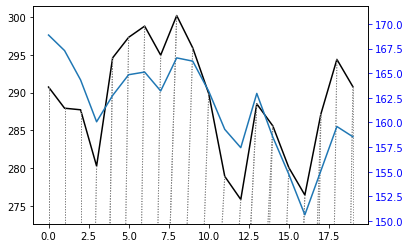

<AxesSubplot:>

In [7]:
from dtw import *
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(comparison, reference, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)


# Don't understand why the comparison is made with the x axis